In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [5]:
# Load pre-trained GloVe embeddings
embeddings_index = {}
try:
    with open('glove.6B.50d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
except:
    raise("Something error when opening the file.")

words = list(embeddings_index.keys())[:200]
words_vectors = np.array([embeddings_index[word] for word in words])

tsne = TSNE(n_components=2, random_state=0, perplexity=30, max_iter=300)
word_vectors_2d = tsne.fit_transform(words_vectors)

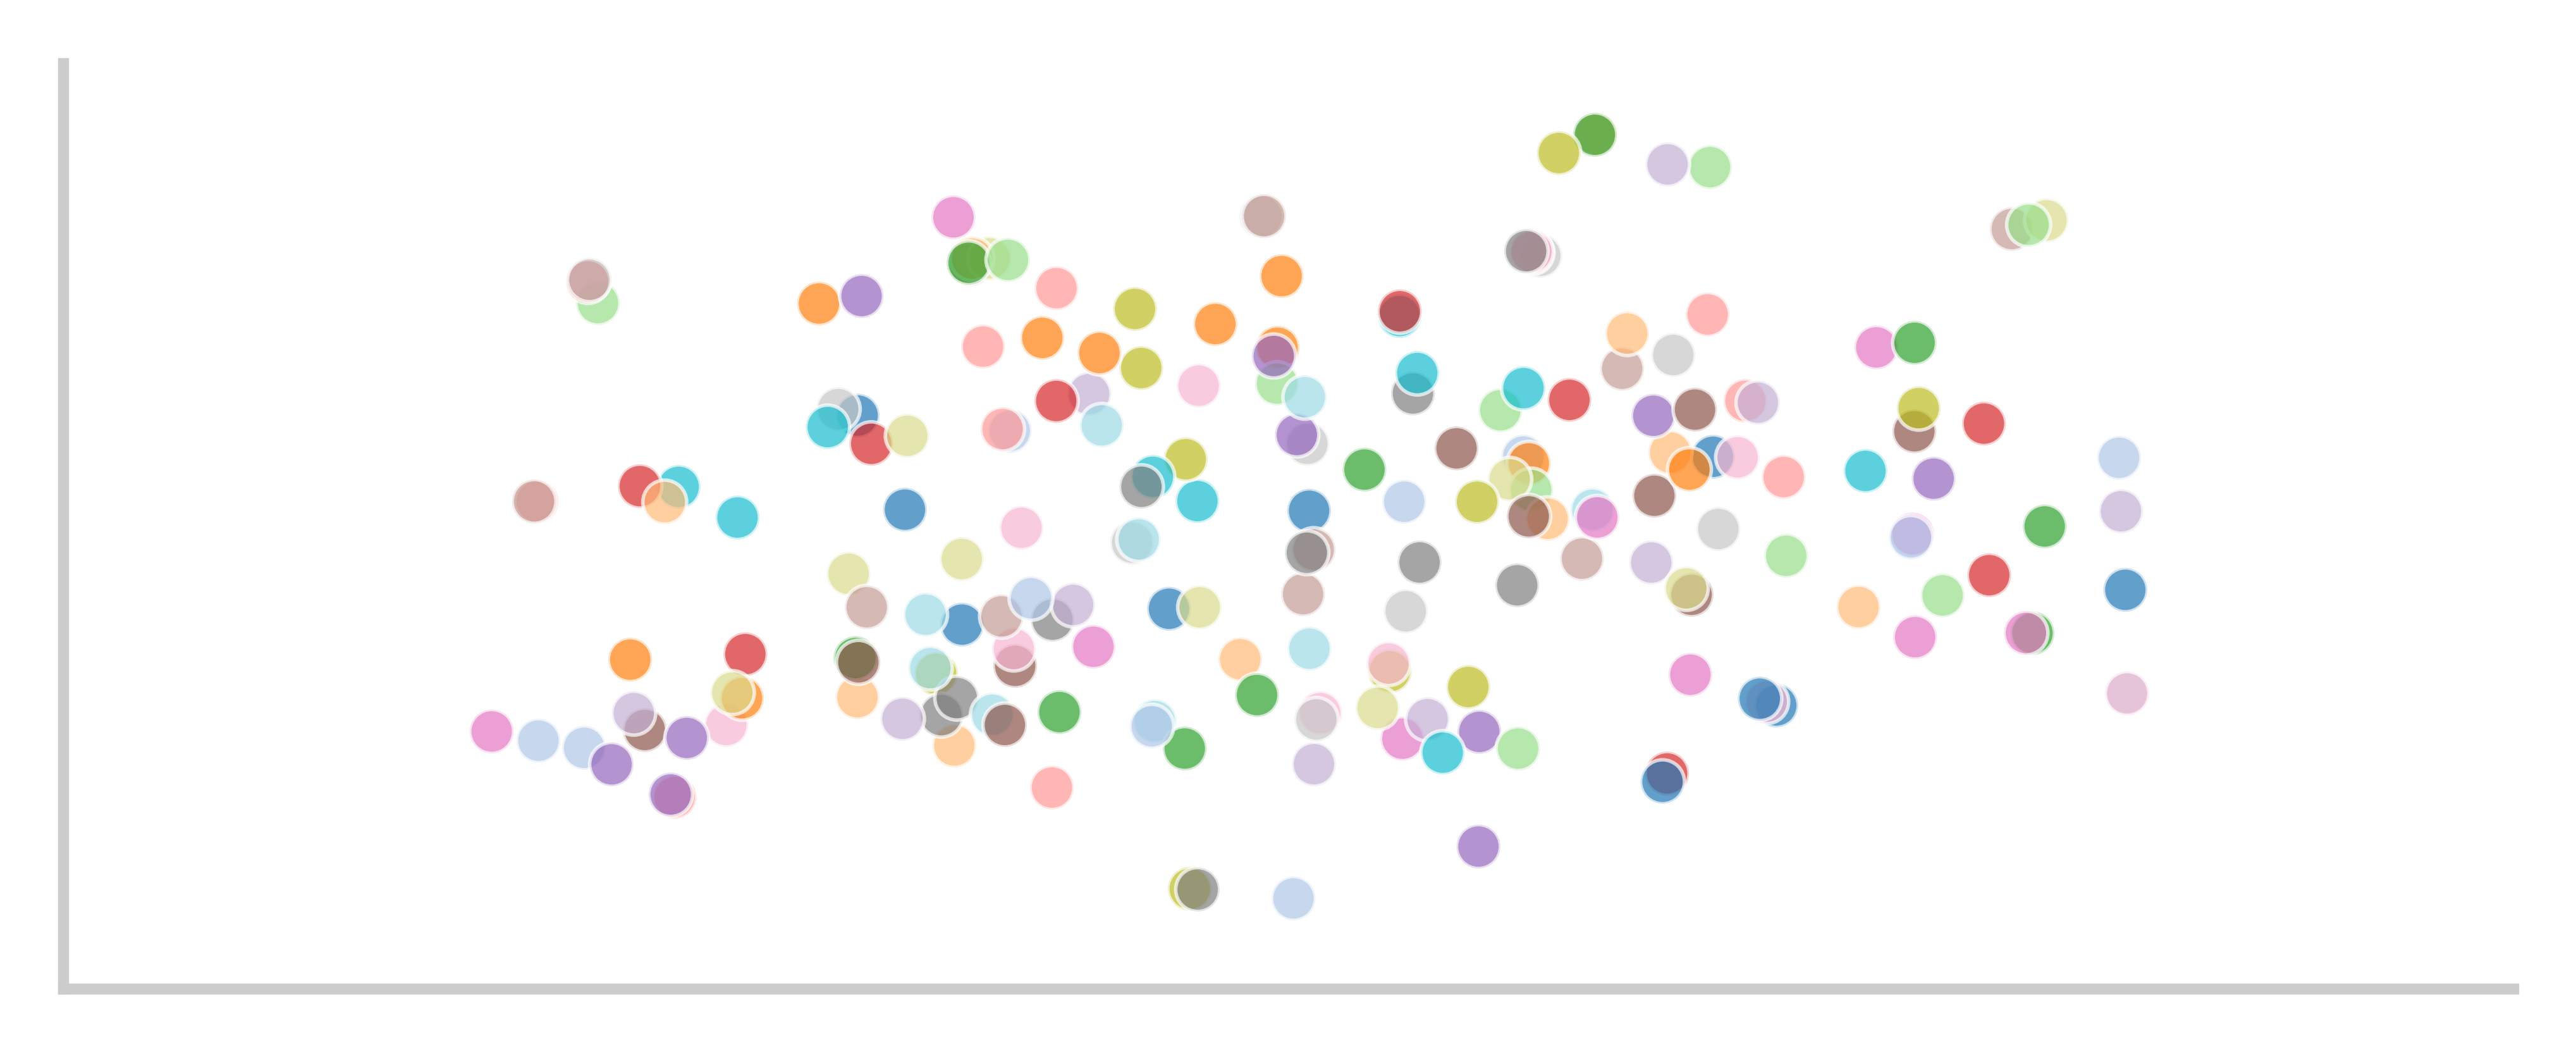

In [6]:
# Convert numpy array to dataframe
df = pd.DataFrame({
    'x': word_vectors_2d[:, 0],
    'y': word_vectors_2d[:, 1],
    'word': words
})

# Set Seaborn style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(5, 1.9), dpi=1000)
plt.grid(True)
ax = sns.scatterplot(data=df, x='x', y='y', hue='word', palette='tab20', legend=None, s=25, alpha=0.7)

# Customize plot appearance
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-15, 15)  # Adjust these values as needed
ax.set_ylim(-15, 15)

# disabling xticks and yticks by Setting xticks to an empty list
plt.xticks([])
plt.yticks([])

# Show plot
plt.savefig('Word Embeddings 2D.png', bbox_inches='tight', transparent=True, dpi=1000)
plt.show()